Dataset Dimensions: (4360, 13)

Column Names: ['rownames', 'nr', 'year', 'school', 'exper', 'union', 'ethn', 'maried', 'health', 'wage', 'industry', 'occupation', 'residence']

Data Types:
 rownames        int64
nr              int64
year            int64
school          int64
exper           int64
union          object
ethn           object
maried         object
health         object
wage          float64
industry       object
occupation     object
residence      object
dtype: object

Summary Statistics:
           rownames            nr         year       school        exper  \
count  4360.000000   4360.000000  4360.000000  4360.000000  4360.000000   
mean   2180.500000   5262.058716  1983.500000    11.766972     6.514679   
std    1258.767916   3496.149815     2.291551     1.746181     2.825873   
min       1.000000     13.000000  1980.000000     3.000000     0.000000   
25%    1090.750000   2329.000000  1981.750000    11.000000     4.000000   
50%    2180.500000   4569.000000  1983

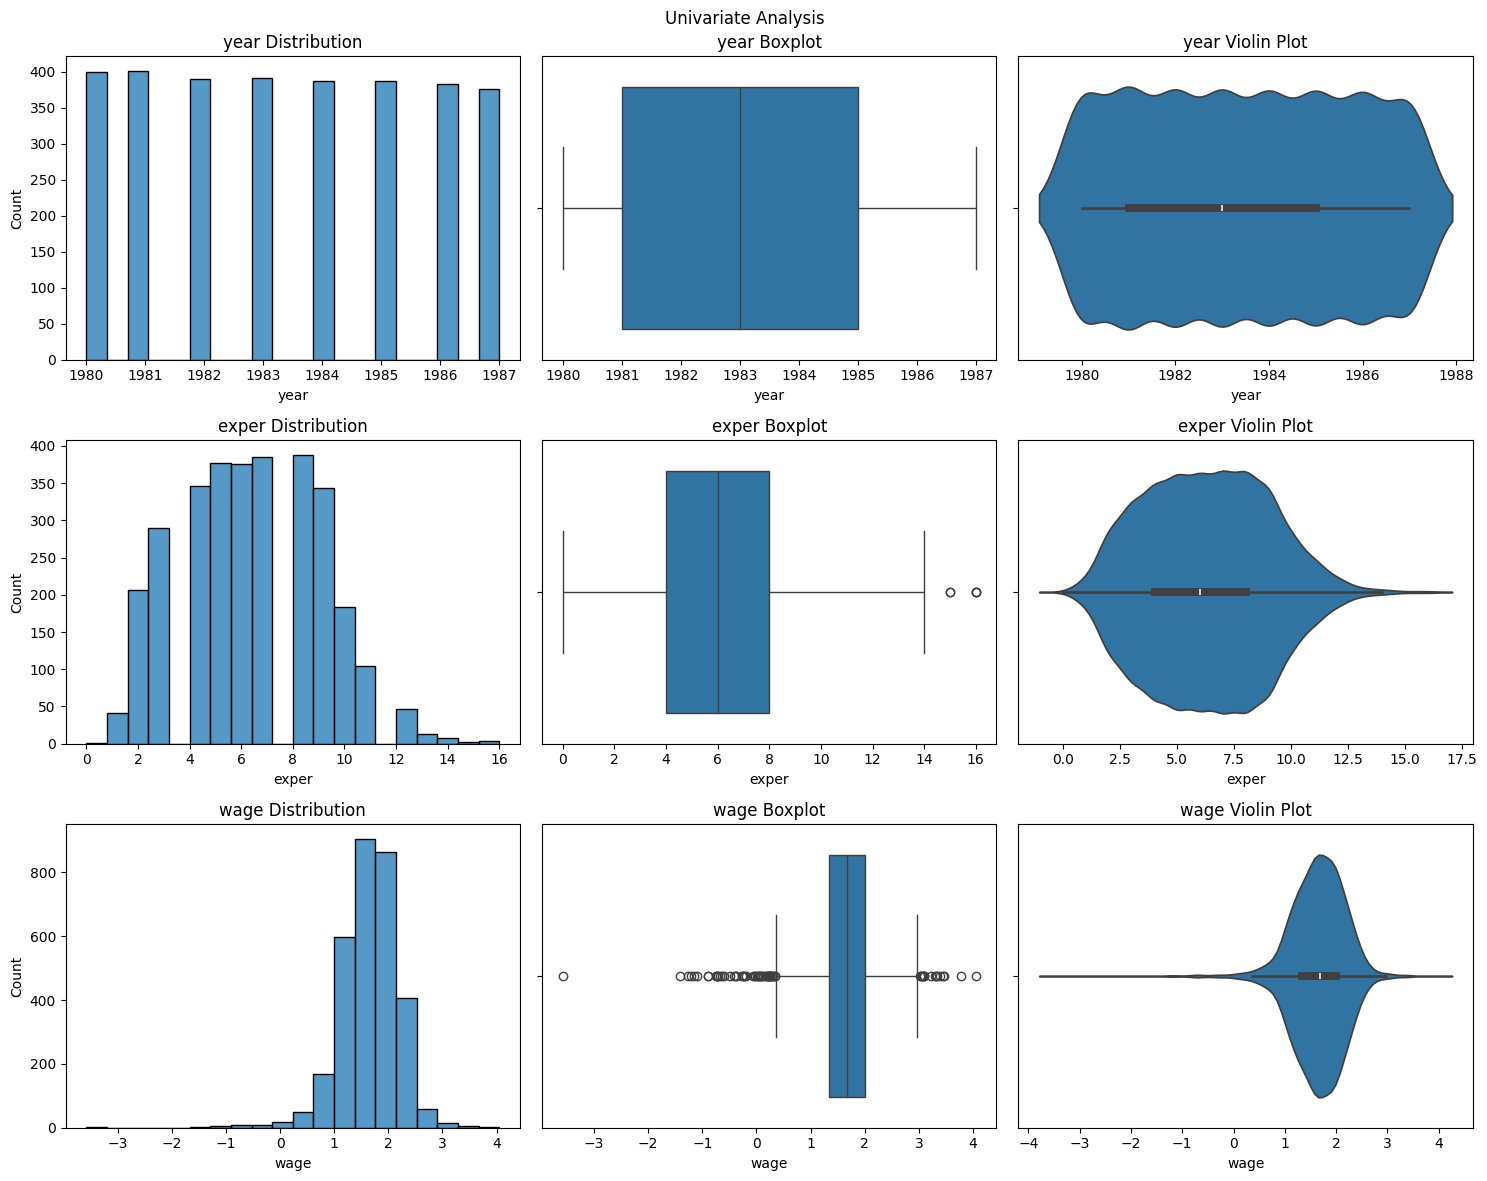

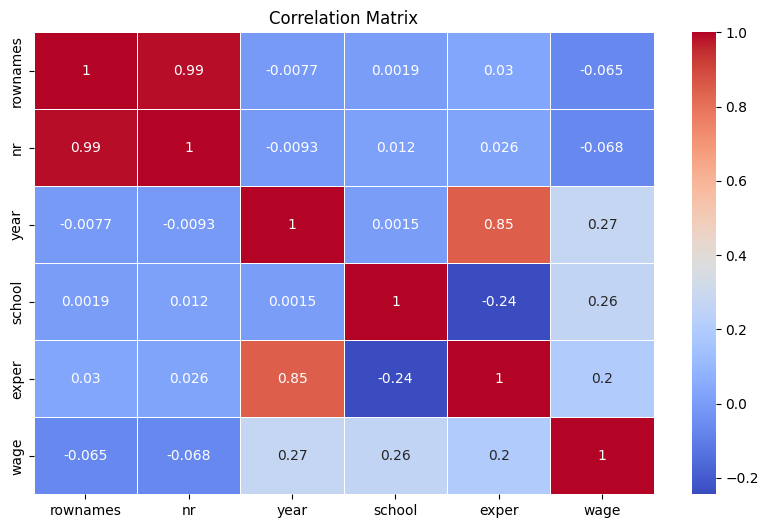

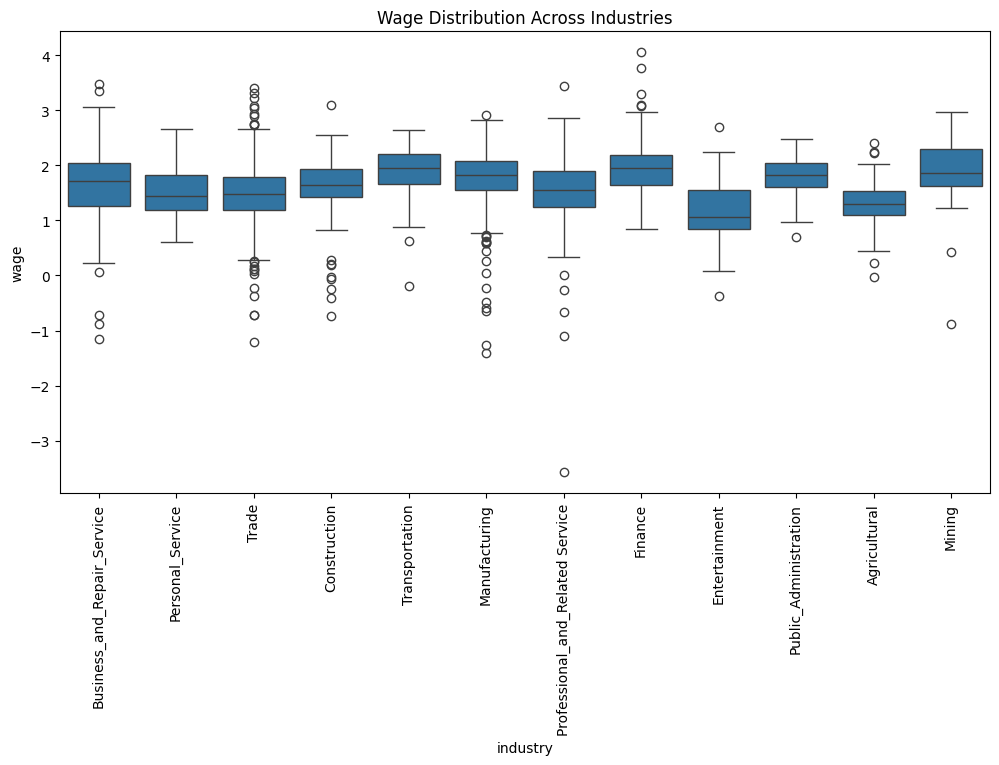

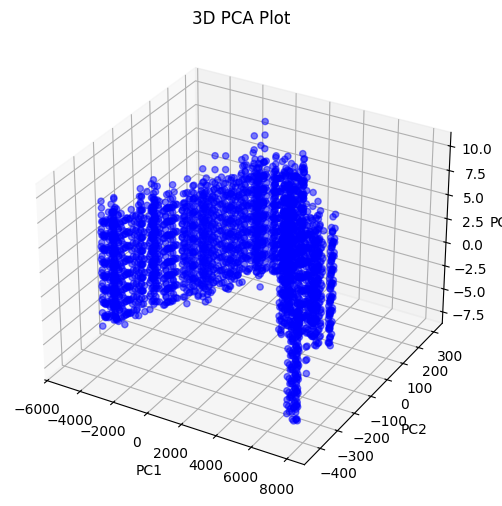

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Males.csv")

# Display basic information
print("Dataset Dimensions:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

# Handling missing values
df.dropna(inplace=True)  # Drop missing values (alternative: impute them)
print("\nMissing Values After Cleaning:\n", df.isnull().sum())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)

# Univariate Analysis
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Univariate Analysis')
columns = ['year', 'exper', 'wage']  # Numeric columns for visualization

for i, col in enumerate(columns):
    sns.histplot(df[col], bins=20, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} Distribution')
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} Boxplot')
    sns.violinplot(x=df[col], ax=axes[i, 2])
    axes[i, 2].set_title(f'{col} Violin Plot')

plt.tight_layout()
plt.show()

# Bivariate Analysis
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Boxplot of Wage by Industry
plt.figure(figsize=(12, 6))
sns.boxplot(x='industry', y='wage', data=df)
plt.xticks(rotation=90)
plt.title("Wage Distribution Across Industries")
plt.show()

# Multivariate Analysis (PCA for dimensionality reduction)
num_df = df.select_dtypes(include=[np.number])  # Selecting numeric columns
if num_df.shape[1] >= 3:
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(num_df.dropna())
    df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c='blue', alpha=0.5)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title('3D PCA Plot')
    plt.show()
else:
    print("Not enough numerical columns for PCA.")
